In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

# Extracting the files and converting it into dataframe.

In [2]:
def extract_list(text_file):
    with open(text_file, 'r') as f:
        List = []
        for i in f:
            List.append(i)
        string = List[0]
        numbers = re.findall('\d+', string)
        num_list = list(map(int, numbers))
    return num_list

In [3]:
data0 = extract_list("data0 (1).txt")
data109 = extract_list("data109.txt")
data112 = extract_list("data112.txt")
data88 = extract_list("data88.txt")
data89 = extract_list("data89.txt")
data9 = extract_list("data9.txt")

In [4]:
df = pd.DataFrame({'data0': data0,'data109': data109,'data112': data112,'data88': data88,'data89': data89,'data9': data9})

In [5]:
df.head()

,data0,data109,data112,data88,data89,data9
0,0,0,120,0,0,0
1,0,0,0,0,0,128
2,0,0,0,0,0,248
3,0,0,120,0,0,0
4,0,128,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   data0    10000 non-null  int64
 1   data109  10000 non-null  int64
 2   data112  10000 non-null  int64
 3   data88   10000 non-null  int64
 4   data89   10000 non-null  int64
 5   data9    10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [7]:
df.describe()

,data0,data109,data112,data88,data89,data9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,59.864800,17.273600,14.992000,15.171200,14.120000,64.128800
std,82.320701,54.134431,49.176191,49.182661,46.917947,86.357357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,0.000000,0.000000,0.000000,0.000000,120.000000
max,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000


# Exploratory Data Analysis

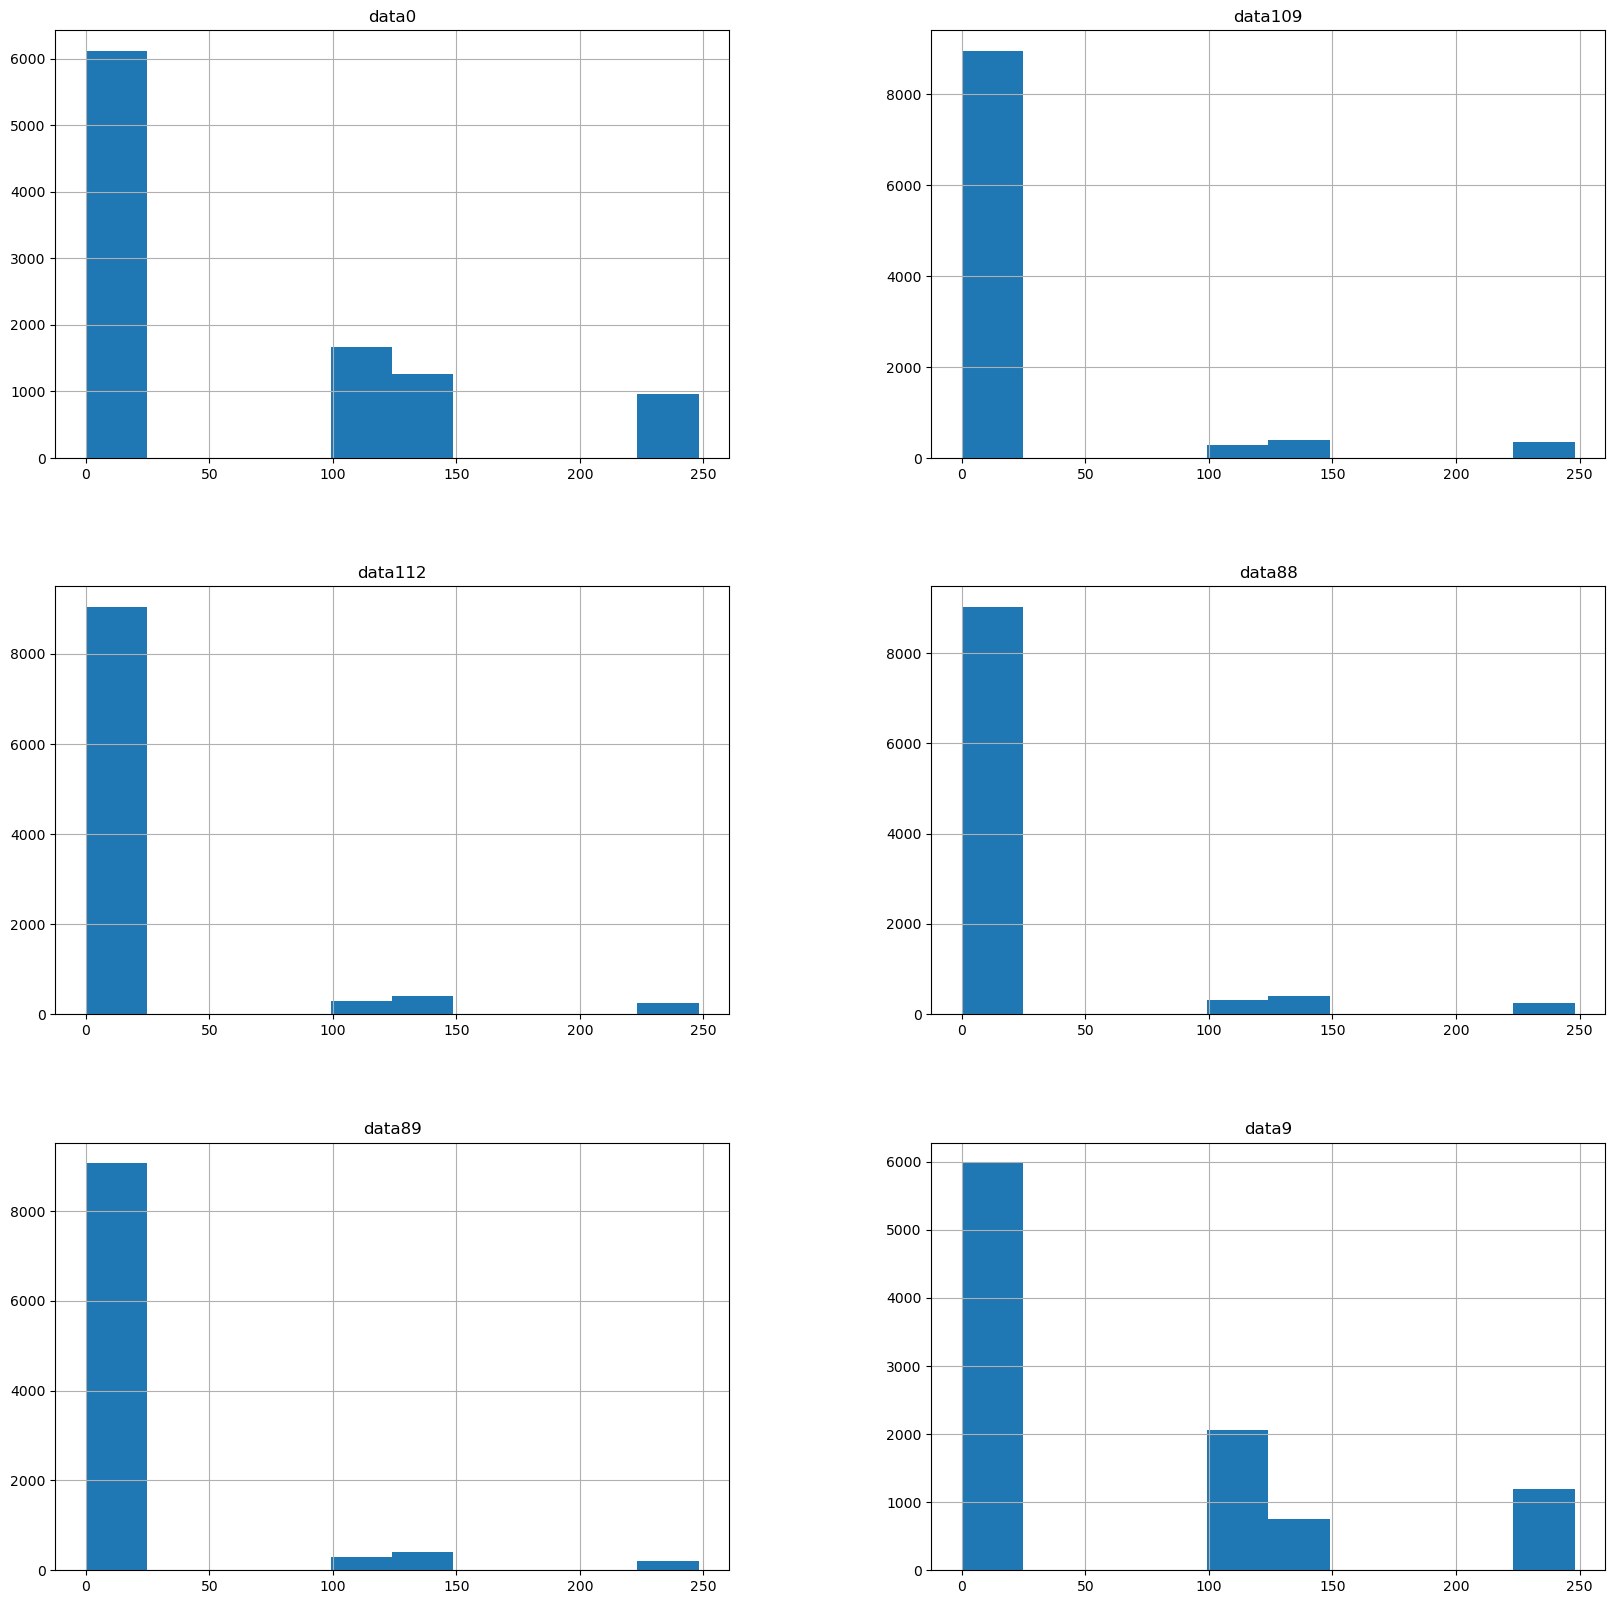

In [8]:
df.hist(figsize=(20,20))
plt.show()

# Data Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
sc = StandardScaler()
df_scale = sc.fit_transform(df)
norm_data = pd.DataFrame(normalize(df_scale))

In [10]:
df_scale

array([[-0.72725077, -0.31910308,  2.13544906, -0.30848185, -0.30096598,
        -0.74263512],
       [-0.72725077, -0.31910308, -0.30487822, -0.30848185, -0.30096598,
         0.73965202],
       [-0.72725077, -0.31910308, -0.30487822, -0.30848185, -0.30096598,
         2.12929622],
       ...,
       [ 0.82772142, -0.31910308, -0.30487822, -0.30848185,  2.25681859,
         0.73965202],
       [-0.72725077, -0.31910308, -0.30487822, -0.30848185, -0.30096598,
        -0.74263512],
       [-0.72725077, -0.31910308, -0.30487822, -0.30848185, -0.30096598,
         2.12929622]])

# Detect anomalies

In [11]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=100
                        ,max_samples="auto",random_state=2)
model.fit(norm_data)

IsolationForest(random_state=2)

In [12]:
df_copy = df.copy()
df_copy["ano"] = model.predict(norm_data)

In [13]:
df_copy.head()

,data0,data109,data112,data88,data89,data9,ano
0,0,0,120,0,0,0,-1
1,0,0,0,0,0,128,-1
2,0,0,0,0,0,248,1
3,0,0,120,0,0,0,-1
4,0,128,0,0,0,0,-1


In [14]:
anom_val = df_copy.iloc[np.where(df_copy["ano"] == -1)]

In [15]:
anom_val

,data0,data109,data112,data88,data89,data9,ano
0,0,0,120,0,0,0,-1
1,0,0,0,0,0,128,-1
3,0,0,120,0,0,0,-1
4,0,128,0,0,0,0,-1
5,0,0,0,0,0,128,-1
...,...,...,...,...,...,...,...
9990,128,0,0,0,120,120,-1
9993,128,0,128,0,0,120,-1
9994,0,0,0,0,0,128,-1
9996,248,0,248,0,0,248,-1


# Converting the data into structure manner

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [17]:
model = kmeans.fit(df_scale)

In [18]:
model

KMeans(n_clusters=5, random_state=0)

In [19]:
inertia = []
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',n_init=10)
    kmeans.fit(df_scale)
    inertia.append(kmeans.inertia_)

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [21]:
model = kmeans.fit(df_scale)

In [22]:
scale_cluster = kmeans.fit_predict(df_scale)

In [23]:
df['cluster'] = scale_cluster

In [24]:
df.head()

,data0,data109,data112,data88,data89,data9,cluster
0,0,0,120,0,0,0,1
1,0,0,0,0,0,128,1
2,0,0,0,0,0,248,1
3,0,0,120,0,0,0,1
4,0,128,0,0,0,0,1


In [25]:
df.cluster.value_counts()

1    9074
0     926
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

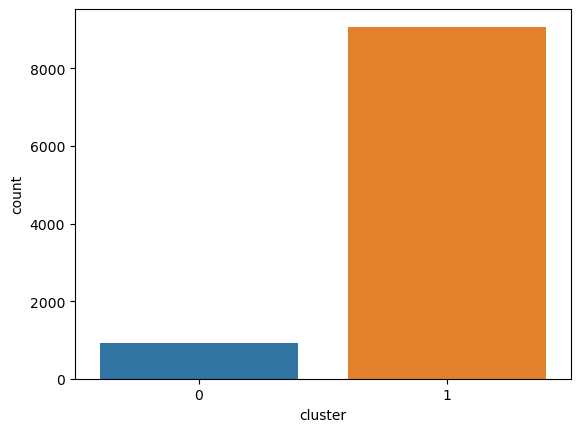

In [26]:
sns.countplot(df['cluster'])

# Data Balancing(Target variable)

In [27]:
from sklearn.utils import resample
df_majority = df[(df['cluster']==1)] 
df_minority = df[(df['cluster']==0)]

In [28]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples= 9074, random_state=42)

In [29]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [30]:
df_upsampled['cluster'].value_counts()

0    9074
1    9074
Name: cluster, dtype: int64

In [31]:
df_upsampled.head()

,data0,data109,data112,data88,data89,data9,cluster
1197,0,0,0,0,128,120,0
5264,248,0,0,0,120,128,0
9770,0,0,128,0,128,120,0
3275,128,0,0,0,128,120,0
1211,0,0,0,0,128,120,0


# Training the data for model building

In [32]:
x = df_upsampled.iloc[:,0:6]
y = df_upsampled.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled = sc.fit_transform(X_train)

In [35]:
x_test_scaled = sc.fit_transform(X_test)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap = False,
                             criterion = 'entropy',
                             max_depth = None,
                             max_features = 2,
                             min_samples_leaf = 1,
                             min_samples_split = 5,
                             n_estimators = 100)
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=2,
                       min_samples_split=5)

In [37]:
predict_rfc = rfc.predict(x_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print('accuracy_score', accuracy_score(y_test,predict_rfc))

accuracy_score 1.0


In [39]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2713
           1       1.00      1.00      1.00      2732

    accuracy                           1.00      5445
   macro avg       1.00      1.00      1.00      5445
weighted avg       1.00      1.00      1.00      5445



In [40]:
print(confusion_matrix(y_test, predict_rfc))

#TP FN
#FP TN

[[2713    0]
 [   0 2732]]


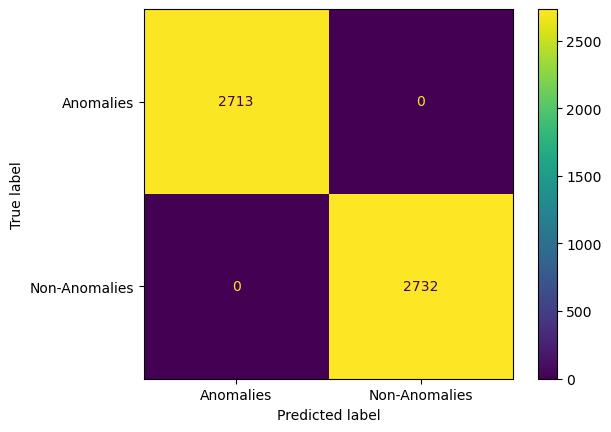

In [41]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve 
plot_confusion_matrix(rfc, x_test_scaled, y_test, values_format='d', display_labels=['Anomalies', 'Non-Anomalies'])

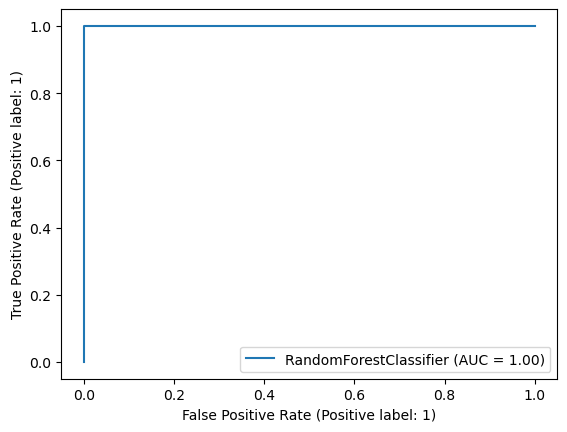

In [42]:
plot_roc_curve(rfc,x_test_scaled,y_test)

# Support Vector Classifier

In [43]:
from sklearn.svm import SVC
svc=SVC(random_state = 42) 

In [44]:
svc.fit(x_train_scaled, y_train)

SVC(random_state=42)

In [45]:
pred_svc = svc.predict(x_test_scaled)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
print("Accuracy of Model is: ",accuracy_score(y_test, pred_svc))

Accuracy of Model is:  1.0


In [47]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2713
           1       1.00      1.00      1.00      2732

    accuracy                           1.00      5445
   macro avg       1.00      1.00      1.00      5445
weighted avg       1.00      1.00      1.00      5445



In [48]:
print(confusion_matrix(y_test, pred_svc))

[[2713    0]
 [   0 2732]]


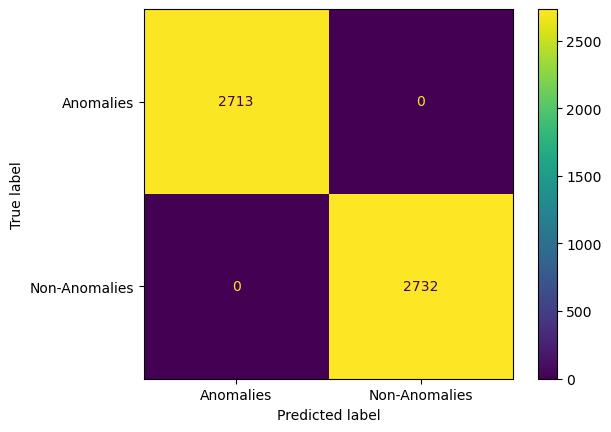

In [49]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
plot_confusion_matrix(svc, x_test_scaled, y_test, values_format='d', display_labels=['Anomalies', 'Non-Anomalies'])

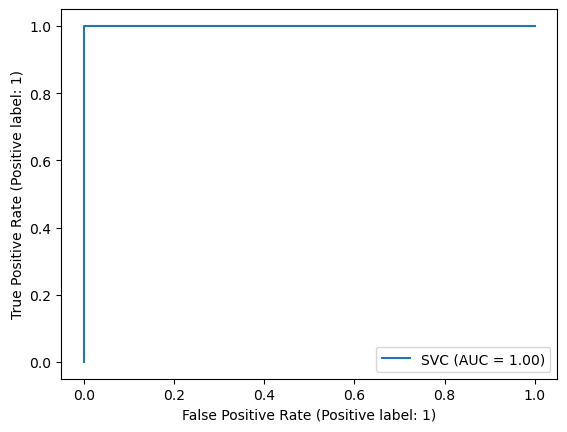

In [50]:
plot_roc_curve(svc,x_test_scaled,y_test)